# Can You Fend Off The Alien Armada?

For proper formatting I recommend viewing this notebook using [nbviewer](https://nbviewer.org/github/Booleans/riddler-538/blob/main/fend-off-the-alien-armada.ipynb).

**2023-01-06**: https://fivethirtyeight.com/features/can-you-fend-off-the-alien-armada/

From James Anderson comes a puzzle to stave off galactic disaster:

The astronomers of [Planet Xiddler](https://fivethirtyeight.com/features/can-you-measure-the-mystery-planet/) are back in action! Unfortunately, this time they have used their telescopes to spot an armada of hostile alien warships on a direct course for Xiddler. The armada will be arriving in exactly 100 days. ([Recall](https://fivethirtyeight.com/features/can-you-pinpoint-the-planet/) that, like Earth, there are 24 hours in a Xiddler day.)

Fortunately, Xiddler’s engineers have just completed construction of the planet’s first assembler, which is capable of producing any object. An assembler can be used to build a space fighter to defend the planet, which takes one hour to produce. An assembler can also be used to build another assembler (which, in turn, can build other space fighters or assemblers). However, building an assembler is more time-consuming, requiring six whole days. Also, you cannot use multiple assemblers to build one space fighter or assembler in a shorter period of time.

What is the greatest number of space fighters the Xiddlerian fleet can have when the alien armada arrives?

### Solution

Let $t$ represent the number of hours that have passed.

Imagine a scenario where we order a single assembler to create space fighters. The number of fighters produced after $t$ hours is simply $t$. 

$$Fighters(t) = t$$

Now imagine we have our assembler produce another assembler, and then both switch to producing fighters. 

$$ Fighters(t)=   \left\{
\begin{array}{ll}
      0 & t<24 \\
      2\times(t-24) & t>=24 
\end{array} 
\right.  $$

The first assembler takes 24 hours to create a second assembler, then they produce 2 fighters for every hour beyond that.

After a certain number of hours, the second strategy will be able to outproduce the single assembler strategy. We can set the two equations equal to each other and solve for some value of $t > 24$.

$$ t = 2\times(t-24)$$

$$ t = 2t - 48$$

$$t=48$$

After 48 hours, both strategies will have produced the same number of fighters, 48. This means that as long as there are more than 48 hours remaining, the people of Xiidler should have every assembler making another assembler. Once there are exactly 48 hours remaining, it does not matter if we make more assemblers or begin producing fighter ships. But once we have less than 48 hours remaining we need to switch to fighter ship production.

With all assemblers producing assemblers, we will be doubling our assemblers every 24 hours. Then, with 24 hours remaining before the enemy armada arrives, we will switch all assemblers to producing one fighter per hour. Therefore, the maximum number of fighters we produce is:

$$ 2^{99}*24  = 15211807202738752817960438464512$$

In [1]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
(2**99)*24

15211807202738752817960438464512

In [3]:
hours = [num for num in range(0, 61)]
strategy_one = [t for t in hours]
strategy_two = [0 if t < 24 else 2*(t-24) for t in hours]

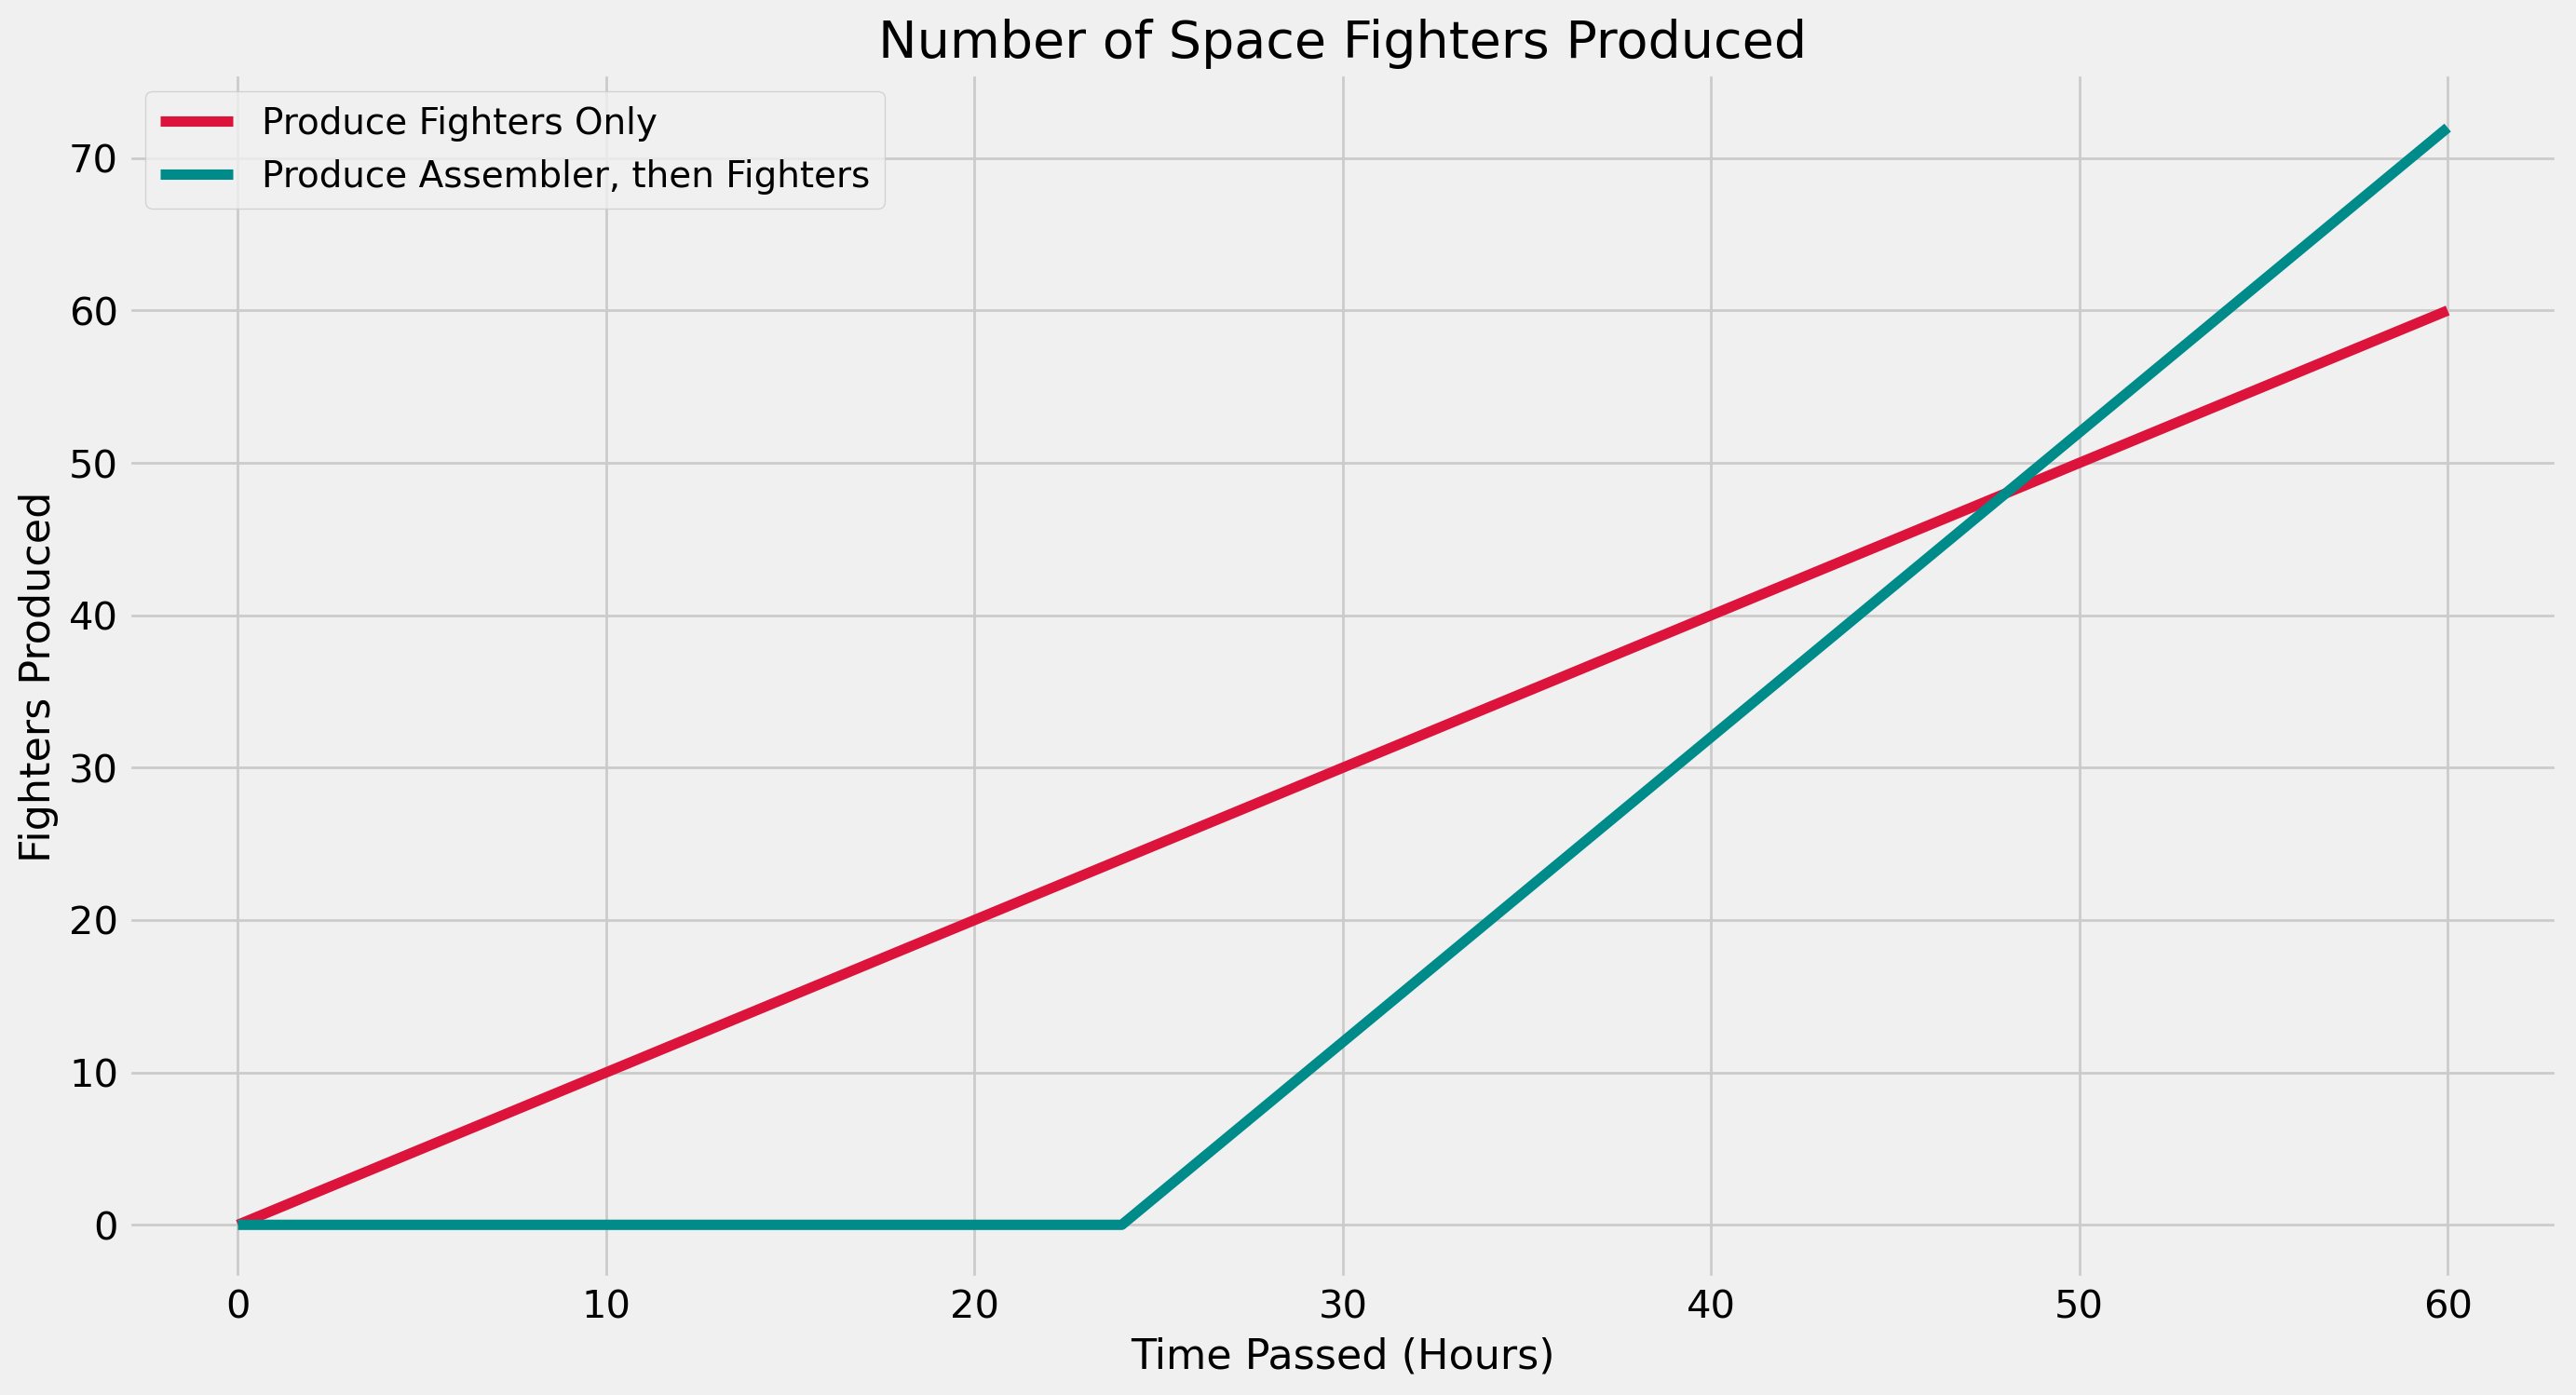

In [4]:
fig, ax = plt.subplots(figsize=(15, 8))
ax.plot(hours, strategy_one, color='crimson')
ax.plot(hours, strategy_two, color='darkcyan')
ax.legend(['Produce Fighters Only', 'Produce Assembler, then Fighters'])
ax.set_title('Number of Space Fighters Produced', fontsize=20)
ax.set_ylabel('Fighters Produced', fontsize=16)
ax.tick_params(axis='y', labelsize=15);
ax.set_xlabel('Time Passed (Hours)', fontsize=16)
ax.tick_params(axis='x', labelsize=15);